In [47]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow.keras.layers as layers
import yaml
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [48]:
with open('config.yml') as file:
    config = yaml.load(file, Loader=yaml.FullLoader)
    print(config)
BATCH_SIZE = config['learning']['BATCH_SIZE']
LEARNING_RATE = config['learning']['LEARNING_RATE']
DROP_OUT_RATE = config['learning']['DROP_OUT_RATE']
EPOCHS = config['learning']['EPOCHS']

{'learning': {'BATCH_SIZE': 1, 'LEARNING_RATE': 0.001, 'DROP_OUT_RATE': 0.5, 'EPOCHS': 100}, 'system': {'test': True, 'model_name': 'ann_plus_model.h5'}}


In [49]:
df = pd.read_excel('preprocessing.xlsx')
df

,Survived,Age,Fare,age_range,family,is_one_Parch,is_one_SibSp,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,3,1,0,1,0,1,0,0,1
1,1,38.0,71.2833,3,1,0,1,1,0,1,0,0
2,1,26.0,7.9250,3,0,0,0,1,0,0,0,1
3,1,35.0,53.1000,3,1,0,1,1,0,0,0,1
4,0,35.0,8.0500,3,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,3,0,0,0,0,1,0,0,1
887,1,19.0,30.0000,2,0,0,0,1,0,0,0,1
888,0,30.0,23.4500,3,3,0,1,1,0,0,0,1
889,1,26.0,30.0000,3,0,0,0,0,1,1,0,0


In [50]:
# # categorical columns encoding
# categorical_columns = ['Pclass', 'Sex']
# for col in categorical_columns:
#     le = preprocessing.LabelEncoder()
#     le.fit(df[col].values)
#     df[col] = le.transform(df[col].values)

In [51]:
# train, test, validation data split
train, test = train_test_split(df, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)

In [52]:
# pop label
y_train = train.pop('Survived')
y_test = test.pop('Survived')
y_val = val.pop('Survived')

In [57]:
early_terminator = EarlyStopping(monitor='val_accuracy', mode='max', patience=3, min_delta=0.001)
model_check = ModelCheckpoint('ann_plus_model.h5', save_best_only=True)

In [58]:
def ANN(optimizer):
    ann = Sequential()
    ann.add(Dense(units=32, kernel_initializer='glorot_uniform', activation='relu'))
    ann.add(Dense(units=64, kernel_initializer='glorot_uniform', activation='relu'))
    ann.add(Dropout(rate=DROP_OUT_RATE))
    ann.add(Dense(units=64, kernel_initializer='glorot_uniform', activation='relu'))
    ann.add(Dropout(rate=DROP_OUT_RATE))
    ann.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))
    ann.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return ann

In [59]:
opt = tf.optimizers.Adam(lr=0.001)
model = ANN(opt)
history = model.fit(train, y_train, batch_size=BATCH_SIZE, validation_data=(val, y_val), epochs=EPOCHS, callbacks=[model_check, ])

Epoch 1/100


/opt/anaconda3/envs/test/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


569/569 [==============================] - 2s 2ms/step - loss: 1.7276 - accuracy: 0.5712 - val_loss: 0.7776 - val_accuracy: 0.6294
Epoch 2/100
569/569 [==============================] - 1s 1ms/step - loss: 0.8090 - accuracy: 0.6344 - val_loss: 0.6892 - val_accuracy: 0.6923
Epoch 3/100
569/569 [==============================] - 1s 2ms/step - loss: 0.6823 - accuracy: 0.6538 - val_loss: 0.6745 - val_accuracy: 0.6713
Epoch 4/100
569/569 [==============================] - 1s 1ms/step - loss: 0.6539 - accuracy: 0.6696 - val_loss: 0.6482 - val_accuracy: 0.6084
Epoch 5/100
569/569 [==============================] - 1s 1ms/step - loss: 0.6208 - accuracy: 0.6977 - val_loss: 0.6133 - val_accuracy: 0.6154
Epoch 6/100
569/569 [==============================] - 1s 1ms/step - loss: 0.6167 - accuracy: 0.6714 - val_loss: 0.6159 - val_accuracy: 0.6643
Epoch 7/100
569/569 [==============================] - 1s 2ms/step - loss: 0.5941 - accuracy: 0.6872 - val_loss: 0.6211 - val_accuracy: 0.5944
Epoch 8/100

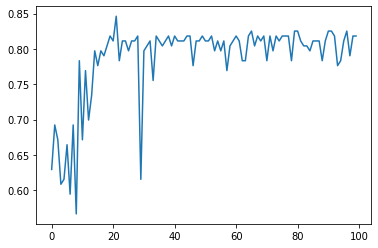

In [60]:
plt.plot(history.history['val_accuracy'])